In [1]:
import $ivy.`sh.almond::ammonite-spark:0.13.9`
import $ivy.`sh.almond::almond-spark:0.13.9`
import $ivy.`org.apache.spark::spark-sql:3.4.0`

import $ivy.`org.apache.hadoop:hadoop-aws:3.3.5`
import $ivy.`org.apache.parquet:parquet-hadoop:1.13.0`

import $ivy.`com.github.haifengl::smile-scala:3.0.1`
import $ivy.`com.github.haifengl:smile-core:3.0.1`
import $ivy.`com.github.haifengl:smile-mkl:3.0.1`
//import $ivy.`org.slf4j:slf4j-simple:2.0.7`
import $ivy.`org.apache.parquet:parquet-common:1.13.0`
import $ivy.`org.apache.parquet:parquet-column:1.13.0`
import $ivy.`org.apache.parquet:parquet-encoding:1.13.0`
import $ivy.`org.apache.parquet:parquet-avro:1.13.0`
import $ivy.`org.apache.parquet:parquet-hadoop:1.13.0`
import $ivy.`org.apache.parquet:parquet-hadoop-bundle:1.13.0`

import $ivy.`org.bytedeco:javacpp:1.5.8`
import $ivy.`org.bytedeco:javacv:1.5.8`
import $ivy.`org.bytedeco:openblas:0.3.21-1.5.8`
import $ivy.`org.bytedeco:openblas-platform:0.3.21-1.5.8`
import $ivy.`org.bytedeco:arpack-ng:3.8.0-1.5.8`
import $ivy.`org.apache.hadoop:hadoop-core:1.2.1`
import $ivy.`org.apache.hadoop:hadoop-common:3.3.5`
import $ivy.`org.apache.hadoop:hadoop-hdfs:3.3.5`

import $ivy.$                                 

import $ivy.$                               

import $ivy.$                                  


import $ivy.$                                   

import $ivy.$                                         


import $ivy.$                                       

import $ivy.$                                     

import $ivy.$                                    
//import $ivy.`org.slf4j:slf4j-simple:2.0.7`

import $ivy.$                                         

import $ivy.$                                         

import $ivy.$                                           

import $ivy.$                                       

import $ivy.$                                         

import $ivy.$                                                


import $ivy.$                           

import $ivy.$                          

import $ivy.$                                   

import $ivy.$                                            

import $ivy

In [37]:
import java.awt.Color
import scala.language.postfixOps
import smile.read
import smile.data.DataFrame
import smile.interpolation.BicubicInterpolation
import smile.data.formula._
import smile.plot.show
import smile.plot.swing.heatmap
import smile.plot.swing.Palette
import smile.plot.swing._
import smile.plot.Render._
import smile.validation.{cv, RegressionValidation}
import smile.regression.GradientTreeBoost
import smile.write

import java.awt.Color

import scala.language.postfixOps

import smile.read

import smile.data.DataFrame

import smile.interpolation.BicubicInterpolation

import smile.data.formula._

import smile.plot.show

import smile.plot.swing.heatmap

import smile.plot.swing.Palette

import smile.plot.swing._

import smile.plot.Render._

import smile.validation.{cv, RegressionValidation}

import smile.regression.GradientTreeBoost

import smile.write

In [3]:
// the matrix to display
val z = Array(
  Array(1.0, 2.0, 4.0, 1.0),
  Array(6.0, 3.0, 5.0, 2.0),
  Array(4.0, 2.0, 1.0, 5.0),
  Array(5.0, 4.0, 2.0, 3.0)
)

// make the matrix larger with bicubic interpolation
val x = Array(0.0, 1.0, 2.0, 3.0)
val y = Array(0.0, 1.0, 2.0, 3.0)
val bicubic = new BicubicInterpolation(x, y, z)
val Z = Array.ofDim[Double](101, 101)
for (i <- 0 to 100) {
  for (j <- 0 to 100)
    Z(i)(j) = bicubic.interpolate(i * 0.03, j * 0.03)
}

show(heatmap(Z, Palette.jet(256)))

SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.


z: Array[Array[Double]] = Array(
  Array(1.0, 2.0, 4.0, 1.0),
  Array(6.0, 3.0, 5.0, 2.0),
  Array(4.0, 2.0, 1.0, 5.0),
  Array(5.0, 4.0, 2.0, 3.0)
)
x: Array[Double] = Array(0.0, 1.0, 2.0, 3.0)
y: Array[Double] = Array(0.0, 1.0, 2.0, 3.0)
bicubic: BicubicInterpolation = BiCubic Interpolation
Z: Array[Array[Double]] = Array(
  Array(
    1.0,
    1.0295635,
    1.058308,
    1.0863145,
    1.113664,
    1.1404375,
    1.166716,
    1.1925805,
    1.218112,
    1.2433915,
    1.2685,
    1.2935185,
    1.318528,
    1.3436095,
    1.368844,
    1.3943124999999998,
    1.420096,
    1.4462755,
    1.4729320000000001,
    1.5001465,
    1.528,
    1.5565734999999998,
    1.585948,
    1.6162044999999998,
    1.647424,
    1.6796875,
    1.713076,
    1.7476705,
    1.7835519999999998,
    1.8208015,
    1.8595,
    1.8997284999999997,
    1.941568,
    1.9850995,
    2.031376,
    2.083375,
    2.140864,
...

In [5]:
val iris = read.arff("iris.arff")
val canvas = plot(iris, "sepallength", "sepalwidth", "class", '*')
canvas.setAxisLabels("sepallength", "sepalwidth")
show(canvas)

iris: DataFrame = [sepallength: float, sepalwidth: float, petallength: float, petalwidth: float, class: byte nominal[Iris-setosa, Iris-versicolor, Iris-virginica]]
+-----------+----------+-----------+----------+-----------+
|sepallength|sepalwidth|petallength|petalwidth|      class|
+-----------+----------+-----------+----------+-----------+
|        5.1|       3.5|        1.4|       0.2|Iris-setosa|
|        4.9|         3|        1.4|       0.2|Iris-setosa|
|        4.7|       3.2|        1.3|       0.2|Iris-setosa|
|        4.6|       3.1|        1.5|       0.2|Iris-setosa|
|          5|       3.6|        1.4|       0.2|Iris-setosa|
|        5.4|       3.9|        1.7|       0.4|Iris-setosa|
|        4.6|       3.4|        1.4|       0.3|Iris-setosa|
|          5|       3.4|        1.5|       0.2|Iris-setosa|
|        4.4|       2.9|        1.4|       0.2|Iris-setosa|
|        4.9|       3.1|        1.5|       0.1|Iris-setosa|
+-----------+----------+-----------+----------+---------


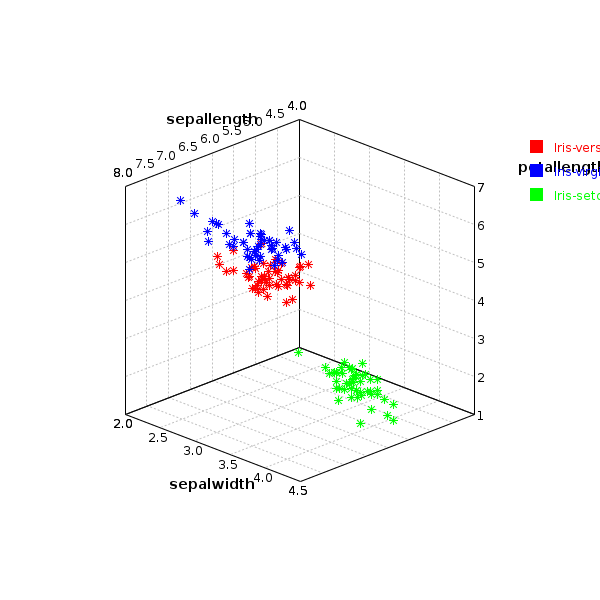

canvas: Canvas = smile.plot.swing.Canvas@73d85b36
res5_1: Canvas = smile.plot.swing.Canvas@73d85b36

In [6]:
val canvas = plot(iris, "sepallength", "sepalwidth", "petallength", "class", '*')
canvas.setAxisLabels("sepallength", "sepalwidth", "petallength")
show(canvas)

In [11]:
val diabetes = read.csv("diabetes.csv")
val validated = cv.regression(10, "y"~, diabetes) { (formula, data) => smile.regression.gbm(formula, data) }

diabetes: DataFrame = [y: int, x2.age: double, x2.sex: double, x2.bmi: double, x2.map: double, x2.tc: double, x2.ldl: double, x2.hdl: double, x2.tch: double, x2.ltg: double, x2.glu: double, x2.age^2: double, x2.bmi^2: double, x2.map^2: double, x2.tc^2: double, x2.ldl^2: double, x2.hdl^2: double, x2.tch^2: double, x2.ltg^2: double, x2.glu^2: double, x2.age:sex: double, x2.age:bmi: double, x2.age:map: double, x2.age:tc: double, x2.age:ldl: double, x2.age:hdl: double, x2.age:tch: double, x2.age:ltg: double, x2.age:glu: double, x2.sex:bmi: double, x2.sex:map: double, x2.sex:tc: double, x2.sex:ldl: double, x2.sex:hdl: double, x2.sex:tch: double, x2.sex:ltg: double, x2.sex:glu: double, x2.bmi:map: double, x2.bmi:tc: double, x2.bmi:ldl: double, x2.bmi:hdl: double, x2.bmi:tch: double, x2.bmi:ltg: double, x2.bmi:glu: double, x2.map:tc: double, x2.map:ldl: double, x2.map:hdl: double, x2.map:tch: double, x2.map:ltg: double, x2.map:glu: double, x2.tc:ldl: double, x2.tc:hdl: double, x2.tc:tch: doub

In [14]:
var bestVal: RegressionValidation[GradientTreeBoost] = null
var rmse = Double.MaxValue
validated.rounds.forEach{validation =>
    if (rmse > validation.metrics.rmse) {
        bestVal = validation
        rmse = validation.metrics.rmse
    }
}

bestVal: RegressionValidation[GradientTreeBoost] = {
  fit time: 685.128 ms,
  score time: 5.317 ms,
  validation data size:: 44,
  RSS: 107640.6351,
  MSE: 2446.3781,
  RMSE: 49.4609,
  MAD: 39.8870,
  R2: 43.69%
}
rmse: Double = 49.46087414168236

In [17]:
val results = diabetes.merge(DataFrame.of(bestVal.model.predict(diabetes).map(Array(_)), "prediction"))

results: DataFrame = [y: int, x2.age: double, x2.sex: double, x2.bmi: double, x2.map: double, x2.tc: double, x2.ldl: double, x2.hdl: double, x2.tch: double, x2.ltg: double, x2.glu: double, x2.age^2: double, x2.bmi^2: double, x2.map^2: double, x2.tc^2: double, x2.ldl^2: double, x2.hdl^2: double, x2.tch^2: double, x2.ltg^2: double, x2.glu^2: double, x2.age:sex: double, x2.age:bmi: double, x2.age:map: double, x2.age:tc: double, x2.age:ldl: double, x2.age:hdl: double, x2.age:tch: double, x2.age:ltg: double, x2.age:glu: double, x2.sex:bmi: double, x2.sex:map: double, x2.sex:tc: double, x2.sex:ldl: double, x2.sex:hdl: double, x2.sex:tch: double, x2.sex:ltg: double, x2.sex:glu: double, x2.bmi:map: double, x2.bmi:tc: double, x2.bmi:ldl: double, x2.bmi:hdl: double, x2.bmi:tch: double, x2.bmi:ltg: double, x2.bmi:glu: double, x2.map:tc: double, x2.map:ldl: double, x2.map:hdl: double, x2.map:tch: double, x2.map:ltg: double, x2.map:glu: double, x2.tc:ldl: double, x2.tc:hdl: double, x2.tc:tch: doubl


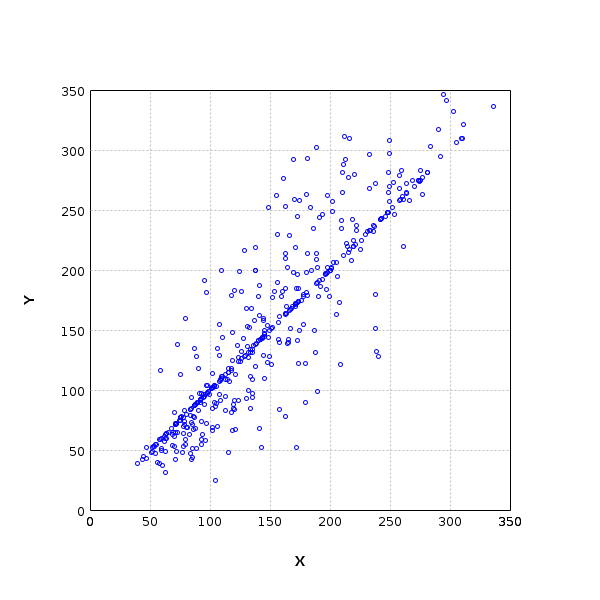

scatter: Canvas = smile.plot.swing.Canvas@471d881e

In [36]:
val scatter = plot(results.select("prediction", "y").toArray(),  mark='o', color=Color.BLUE)
show(scatter)

In [38]:
write(bestVal, "validated_gbt.model")

In [39]:
val readedVal = read("validated_gbt.model").asInstanceOf[RegressionValidation[GradientTreeBoost]]

readedVal: RegressionValidation[GradientTreeBoost] = {
  fit time: 685.128 ms,
  score time: 5.317 ms,
  validation data size:: 44,
  RSS: 107640.6351,
  MSE: 2446.3781,
  RMSE: 49.4609,
  MAD: 39.8870,
  R2: 43.69%
}